# Exploratory Data Analysis

### Imports from source packages

In [1]:
import src.preprocessing as pp
import src.data_analysis as da
import src.visualization as vs
import src.bootstrap as bs
import pandas as pd
%matplotlib inline

### Loading the base data

*Latest data sourced on the 22.08.2023*
* MSCI Indices sourced from the MSCI Homepage: https://www.msci.com/end-of-day-data-search
* S&P500, NASDAQ and DowJones Indices sourced with the Yahoo Finance API using the yfin interface in Python

In [2]:
msci_indices = pd.read_excel("data/230822_MSCI-Data-Monthly.xls", skiprows=6, skipfooter=19, index_col=0)
msci_indices.head()

,ACWI IMI IMI (Large+Mid+Small Cap),ACWI Standard (Large+Mid Cap),WORLD Standard (Large+Mid Cap),EM (EMERGING MARKETS) Standard (Large+Mid Cap),EUROPE Standard (Large+Mid Cap),NORTH AMERICA Standard (Large+Mid Cap)
Date,,,,,,
"May 31, 1994",392.682,155.536,617.906,493.660,600.200,462.582
"Jun 30, 1994",392.593,154.502,615.194,479.180,592.783,447.575
"Jul 29, 1994",398.298,157.656,625.894,508.729,622.737,461.999
"Aug 31, 1994",410.747,162.998,643.738,571.296,641.362,479.633
"Sep 30, 1994",400.733,158.893,625.806,577.286,614.770,469.689


In [3]:
other_indices = pd.read_csv("data/230822_Misc-Indices-Monthly.csv")
other_indices.head()

,Date,S&P 500,NASDAQ,Dow Jones
0,1985-01-01 00:00:00-05:00,179.630005,278.700012,NaN
1,1985-02-01 00:00:00-05:00,181.179993,284.200012,NaN
2,1985-03-01 00:00:00-05:00,180.660004,279.200012,NaN
3,1985-04-01 00:00:00-05:00,179.830002,280.600006,NaN
4,1985-05-01 00:00:00-04:00,189.550003,290.799988,NaN


### Data Processing

In [4]:
base_indices_df = pp.get_indices_data(produce_csv=True)
base_indices_df.head()

,ACWI IMI,ACWI,World,Emerging Markets,Europe,North America,S&P 500,NASDAQ,Dow Jones
1969-12,NaN,NaN,100.000,NaN,100.000,100.000,NaN,NaN,NaN
1970-01,NaN,NaN,94.249,NaN,98.933,93.347,NaN,NaN,NaN
1970-02,NaN,NaN,96.979,NaN,95.657,98.153,NaN,NaN,NaN
1970-03,NaN,NaN,97.075,NaN,96.663,98.514,NaN,NaN,NaN
1970-04,NaN,NaN,87.800,NaN,89.345,89.644,NaN,NaN,NaN


In [5]:
all_indices = pp.add_custom_index(base_indices_df)
all_indices.tail()

,ACWI IMI,ACWI,World,Emerging Markets,Europe,North America,S&P 500,NASDAQ,Dow Jones,70/30
2023-03,416.713779,646.762,2791.438,990.284,1902.850,4082.801,2287.652367,4385.328174,1018.274289,833.242842
2023-04,421.333802,654.997,2835.928,977.046,1971.686,4133.828,2321.148955,4387.003783,1043.491161,839.197404
2023-05,415.223005,646.375,2800.557,958.527,1843.051,4141.318,2326.910853,4641.295110,1007.077456,827.098742
2023-06,438.744582,682.841,2966.724,989.475,1928.433,4411.444,2477.525893,4947.226164,1052.960862,869.462409
2023-07,455.052180,707.109,3064.297,1046.912,1985.863,4558.463,2554.673404,5147.477181,1088.212865,904.620673


In [6]:
all_pct_returns = all_indices.pct_change()

In [7]:
# Optionally save the data if adding new ones

all_indices.to_csv('data/Processed-Data.csv')
all_pct_returns.to_csv('data/Processed-Returns.csv')

### Visual Inspection
As always an exploratory data analysis lives from seeing the data with your own eyes and for that we will first visualize them.
This will help us contextualy the loads of numbers we will be seeing in the following financial analysis

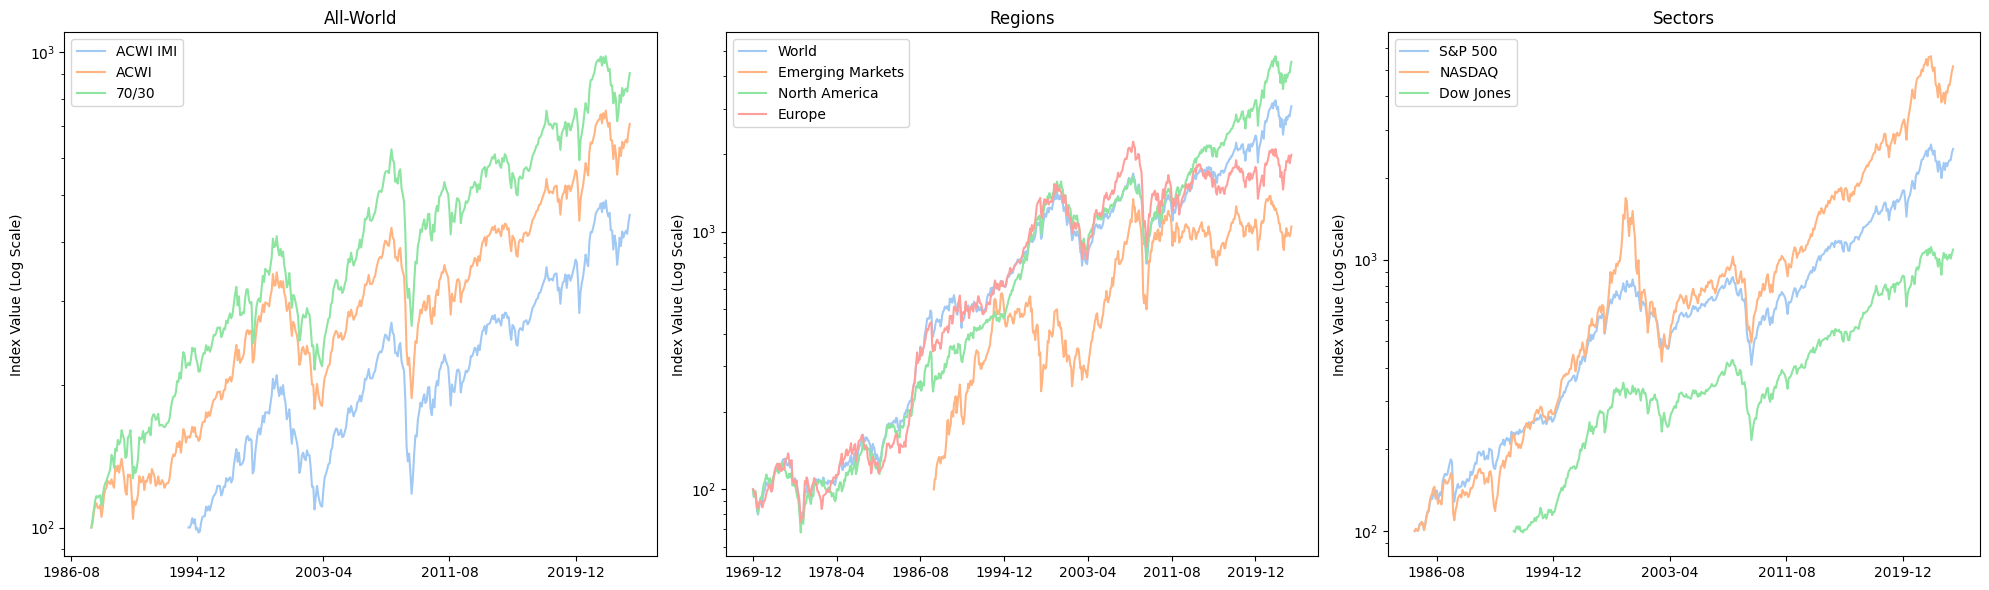

In [8]:
vs.draw_time_series(all_indices)

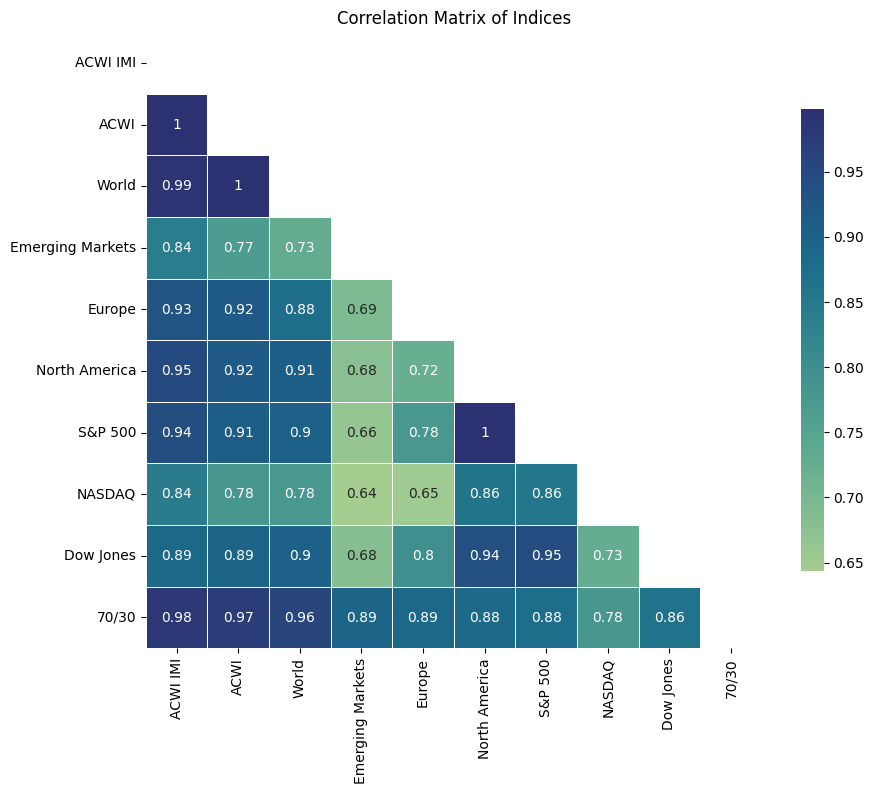

In [9]:
vs.draw_correlation_matrix(all_indices)

### Financial Indicator Analysis
Analysis of key performance indicators for different indices and the given data

In [10]:
kpi = da.calculate_KPI(all_indices)
kpi

,Index Age,CAGR (%),Mean (%),Volatility (%),Max Drawdown (%),Sharpe Ratio
ACWI IMI,29.25,5.32,6.44,15.55,56.37,0.12
ACWI,35.67,5.64,6.68,15.22,56.23,0.13
World,53.67,6.58,7.53,14.91,55.37,0.15
Emerging Markets,35.67,6.81,9.11,22.09,62.67,0.12
Europe,53.67,5.73,7.12,17.41,60.90,0.12
North America,53.67,7.38,8.33,15.32,52.65,0.16
S&P 500,38.58,8.76,9.63,15.25,52.56,0.18
NASDAQ,38.58,10.75,12.61,21.37,75.04,0.17
Dow Jones,31.50,7.87,8.70,14.66,49.30,0.17
70/30,35.67,6.37,7.51,16.04,57.52,0.14


In [11]:
backtest10 = da.perform_data_backtest(all_indices, years=10)
backtest15 = da.perform_data_backtest(all_indices, years=15)
backtest20 = da.perform_data_backtest(all_indices, years=20)

In [12]:
columns10 = [('10 Years', col) for col in backtest10.columns]
columns15 = [('15 Years', col) for col in backtest15.columns]
columns20 = [('20 Years', col) for col in backtest20.columns]

# Set the columns of the DataFrames to be the MultiIndex created from the list of tuples
backtest10.columns = pd.MultiIndex.from_tuples(columns10)
backtest15.columns = pd.MultiIndex.from_tuples(columns15)
backtest20.columns = pd.MultiIndex.from_tuples(columns20)

# Concatenate the DataFrames horizontally
backtest_matrix = pd.concat([backtest10, backtest15, backtest20], axis=1)

# Display the resulting DataFrame
backtest_matrix

10 Years                                            \
                 Best Case CAGR (%) Average Case CAGR (%) Worst Case CAGR (%)   
ACWI IMI                  10.783438              4.654855           -2.830376   
ACWI                      11.557254              5.052746           -3.640968   
World                     16.570687              7.145942           -4.100783   
Emerging Markets          15.222876              4.926772           -2.583152   
Europe                    16.863968              6.642771           -3.828982   
North America             16.815478              7.970414           -4.820202   
S&P 500                   16.750022              7.928985           -5.081599   
NASDAQ                    27.137964             10.412050           -7.143595   
Dow Jones                 13.882844              6.460620           -2.744554   
70/30                     11.342484              5.308887           -1.158855   

                           15 Years                                            \
                 Best Case CAGR (%) Average Case CAGR (%) Worst Case CAGR (%)   
ACWI IMI                   7.873618              4.115695            1.737814   
ACWI                       8.767834              4.366060            1.115958   
World                     14.770358              7.186076            1.180328   
Emerging Markets          10.246080              5.648176           -2.990672   
Europe                    16.891003              7.024973           -2.533809   
North America             15.561127              7.916819            1.701728   
S&P 500                   15.147504              6.814776            1.761716   
NASDAQ                    20.562206              8.981999            0.369074   
Dow Jones                 10.242684              5.784976            2.619020   
70/30                      9.396388              4.975724            0.953885   

                           20 Years                                            
                 Best Case CAGR (%) Average Case CAGR (%) Worst Case CAGR (%)  
ACWI IMI                   6.856514              4.589993            1.518054  
ACWI                       7.220667              4.454087            1.257866  
World                     13.059795              7.126133            1.296482  
Emerging Markets          13.439898              5.873371            2.093539  
Europe                    13.177786              7.227356           -0.628674  
North America             13.952020              8.046291            2.526819  
S&P 500                   10.017336              6.615795            2.762719  
NASDAQ                    11.996403              8.601728            2.639745  
Dow Jones                  8.122559              6.270928            3.543839  
70/30                      9.263714              5.097689            1.859044

# Bootstrap Prediction

### Block Bootstrap: Description and Reasoning

Block Bootstrapping is a good method to model interdependent data, as they are usually not singularities like the regular bootstrap assumes. In fact the data are interconnected, appearing in blocks after one another. As a practical example taking the recent Ukraine Crisis out of Context by slapping it into 5 different bootstrapped years, would be missing the point of global political and economic events which influence more than a singular month.

For that reason my decision was to use block bootstrap with a block size of 12 months that keep together to somewhat mimic the real returns without losing some kind of continuous nuance necessary for proper forecasting. Feel free to play around by adjusting the intervall of blocks and or iterations

The below example is meant to exemplify a realistic scenario without dynamic investment growth, aka ignoring inflation in this case.
Using the Median Income in Germany according to *Stepstone* (sourced from *https://www.stepstone.de/e-recruiting/blog/gehaltsreport-2023/*) which is 43842€ per Year, which after taxes comes out to 2412,57€ per Month.
The renowned non-profit organisation called *Finanztip* recommends a savings rate of 20% of the monthly net income (sourced from *https://www.finanztip.de/blog/so-viel-solltest-du-sparen-die-50-30-20-regel/*) each Month.
As such we arrive at roughly 480€ per Month of recommended saving for the truly average german full-time worker.
According to *Campuejaeger* the average german academic start working with 27 and will work on average up until 67 now, so that would be 40 years. Since you will have years where you can not always save, so we will take 30 years of investing and 35 years of horizon, which should be just around the time when retirement is in sight with the average savings rate to demonstrate a realistic example attainable for at least 50% of the german citizens.

Commonly the MSCI World is the poster child of passive investment in Germany and recommended by many platforms such as *Finanztip*, *Stiftung Warentest* and *Verbraucherzentrale*. And while Emerging Markets are making more and more waves, meaning the MSCI ACWI is being recommended more and more, we will focus this on an average guy who is happy just using the bare-bones low cost World ETF, and does not care to research about factor premia, or look for a suitable 70/30 alternative, which is also a common recommendation.

In [13]:
bootstrap = bs.block_bootstrap(all_pct_returns['World'].dropna().values, investments=[480]*360, investment_interval='M', n_years=30, n_iterations=1000, value_table=True, return_timeseries=True)
bootstrap_kpi = dict(list(bootstrap.items())[:9])
bootstrap_kpi

{'Mean Final Value': 703549.5476973125,
 'Median Final Value': 570627.0823911319,
 'Std. Dev. Final Value': 497995.1569506358,
 '68% CI Final Value': (305128.43837928097, 1078804.8830409145),
 '95% CI Final Value': (161795.91623179617, 2063528.260130703),
 '99.7% CI Final Value': (81796.5032354039, 3458108.2583789304),
 'Mean Yearly Return (%)': 8.15649042630135,
 'Median Yearly Return (%)': 10.012724641607118,
 'Std. Dev. Yearly Return (%)': 16.897010476091456}

### Visualizing Bootstrap Results
To see how bootstraps are distributed we will plot this first. We will see that the bootstrap distribution is very strongly positively skewed, also called a right skew, where the fat tails will be toward the higher end sums of accumulated wealth.
This tells us that our preferred assumption of normality, aka fitting it into the gaussian curve or at least making it close to it is not very reliable here.

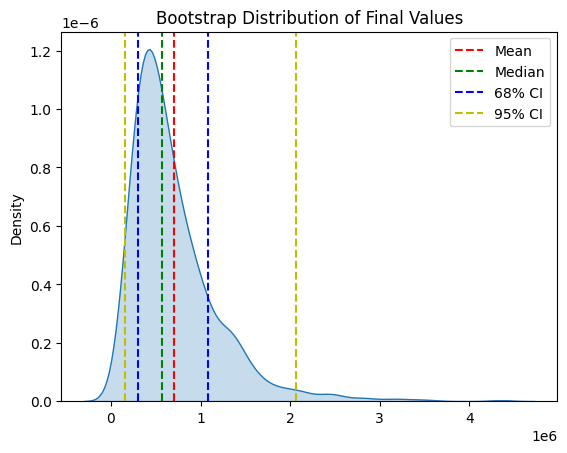

In [14]:
plot = vs.draw_bootstrap_distribution(bootstrap)

Finally we will visualize the results, starting with the mean growth as a line and surrounding it with shaded fiels representing 68% of our bootstrap results.
Additionally another colored bound will apear demarking the 95% of results, which would make any outlier from that group be an incredibly rare phenomenon.  Now while your result is more likely to lie somewhere close to the mean or in its vicinity, for sake of thoroughness two lines at either end of the distribution mark the 99.7% of all results which can be considered the outer bounds of what is "realistic" in a perfect or horrible scenario, especially since we aren't investing into a crazy crypto scheme but rather in a basic low cost ETF variant.

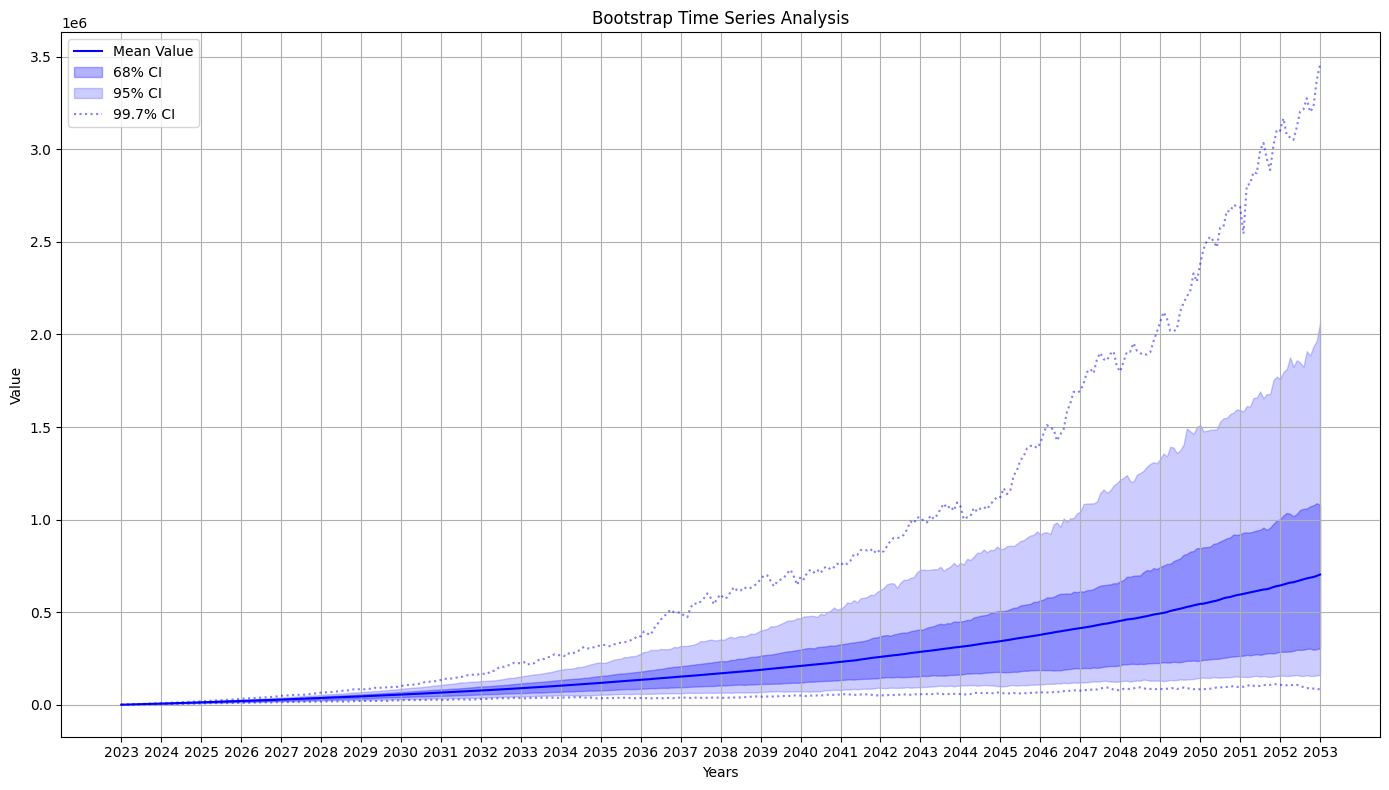

In [15]:
vs.draw_bootstrap_timeseries(bootstrap, start_year=2023)


# Portfolio Forecasting App

When using the recommended version by dockerizing this source code you can visit *port 8501* to look at and play around with the streamlit app, whicgh proviedes a highly customizable version of investment portfolio forecasting we just showed.
This will allow you to visualize your preferred portfolio, choosing between all the previously shown indices such as S&P500, MSCI ACWI, MSCI World or 70/30. In the future this might include FTSE Indices or more customizable portfolio variantes, however much time I find.

When running this without docker, make sure you have run the following install command
> pip install --no-cache-dir -r requirements.txt

After this run this following command in the *src* folder to look at the app.
> streamlit run 

*Remember that I have created this project purely for an easy overview of potential developments of investments and can not guarantee anything about the correctness of the information, although I did try to get the best data sources available for my analysis. None of this is to be taken as an investment recommendation but merely as a presentation of my personal research interest. Even when using the highest precision in my calculations it is impossible to account for all multifactorial influences and thus predict the future of investments. This app merely aims to provide an educated guess about the future situations. In no circumstances is it to be taken as some magic crystal ball for future stock prices or portfolio sizes. Thank you!*